# Car deko price prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(8,4)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r'C:\Users\jm88\Music\DataScience\Project DS\Car details v3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
df.shape

(8128, 13)

In [7]:
df1=df.dropna()
df1.shape

(7906, 13)

In [8]:
df1['No_years']=2023-df1['year']
df1.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,No_years
6085,Tata Safari Storme EX,2017,800000,60000,Diesel,Individual,Manual,First Owner,14.1 kmpl,2179 CC,147.94 bhp,320Nm@ 1500-3000rpm,7.0,6
7868,Maruti Swift AMT VVT VXI,2019,650000,5621,Petrol,Trustmark Dealer,Automatic,First Owner,22.0 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0,4
1481,Maruti Swift Dzire VDI,2016,600000,80000,Diesel,Individual,Manual,Second Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,7
6047,Ford Fiesta 1.4 ZXi TDCi LE,2010,250000,110000,Diesel,Individual,Manual,Third Owner,17.8 kmpl,1399 CC,68 bhp,"16.3@ 2,000(kgm@ rpm)",5.0,13
3358,Toyota Corolla Altis Diesel D4DG,2010,425000,83585,Diesel,Dealer,Manual,First Owner,21.43 kmpl,1364 CC,87.2 bhp,205Nm@ 1800-2800rpm,5.0,13


# EDA & Data cleaning

In [9]:
df2=df1.drop(['name','year','max_power','torque'],axis=1)
df2.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats,No_years
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,5.0,9
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,5.0,9
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,5.0,17
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,5.0,13
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,5.0,16


In [10]:
df2['seats'].unique()

array([ 5.,  4.,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [11]:
df2['engine']=df2['engine'].apply(lambda x : int(x.split(' ')[0]))
df2['mileage']=df2['mileage'].apply(lambda x : (str(x.split(' ')[0])))
df2.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats,No_years
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,5.0,9
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,5.0,9
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,5.0,17
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,5.0,13
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,5.0,16


In [15]:
df2['seats']=df2['seats'].apply(lambda x : round(x))


In [16]:
df2['mileage']=df2['mileage'].astype(float)


In [17]:
df2.dtypes

selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
seats              int64
No_years           int64
dtype: object

In [18]:
df2['mileage']=df2['mileage'].apply(lambda x : round(x))
df2.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats,No_years
0,450000,145500,Diesel,Individual,Manual,First Owner,23,1248,5,9
1,370000,120000,Diesel,Individual,Manual,Second Owner,21,1498,5,9
2,158000,140000,Petrol,Individual,Manual,Third Owner,18,1497,5,17
3,225000,127000,Diesel,Individual,Manual,First Owner,23,1396,5,13
4,130000,120000,Petrol,Individual,Manual,First Owner,16,1298,5,16


In [19]:
Mileage=df2.groupby('mileage')['mileage'].agg('count').sort_values(ascending=False)
Mileage

mileage
19    878
21    747
20    721
18    713
17    611
23    601
16    495
22    495
24    432
14    413
25    384
15    359
13    336
27    169
26    158
12    142
28    137
11     58
10     27
0      17
33      5
9       4
30      2
32      1
42      1
Name: mileage, dtype: int64

In [20]:
df2['mileage']=df2['mileage'].astype(int)

In [21]:
df2.shape

(7906, 10)

In [22]:
df3=df2[df2.mileage>0]
df3.shape

(7889, 10)

In [23]:
df3['seats'].unique()

array([ 5,  4,  7,  8,  6,  9, 10, 14], dtype=int64)

In [24]:
df4=df3[df3['seats']<11]
df4.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats,No_years
0,450000,145500,Diesel,Individual,Manual,First Owner,23,1248,5,9
1,370000,120000,Diesel,Individual,Manual,Second Owner,21,1498,5,9
2,158000,140000,Petrol,Individual,Manual,Third Owner,18,1497,5,17
3,225000,127000,Diesel,Individual,Manual,First Owner,23,1396,5,13
4,130000,120000,Petrol,Individual,Manual,First Owner,16,1298,5,16


In [25]:
# Visualization

Text(0, 0.5, 'Count')

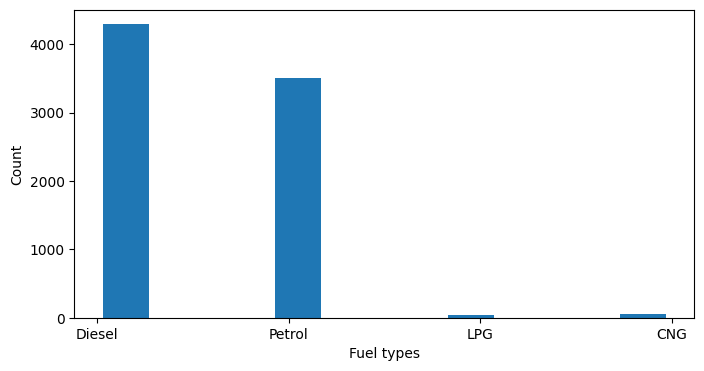

In [26]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (8,4)
plt.hist(df4.fuel,rwidth=0.8)
plt.xlabel("Fuel types")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

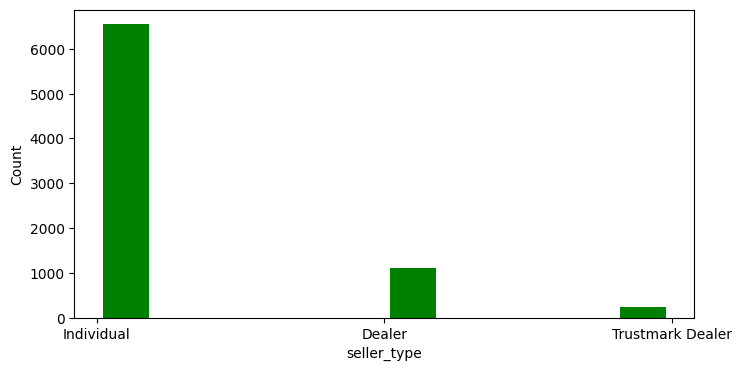

In [27]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (8,4)
plt.hist(df4.seller_type,color='green',rwidth=0.8)
plt.xlabel("seller_type")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

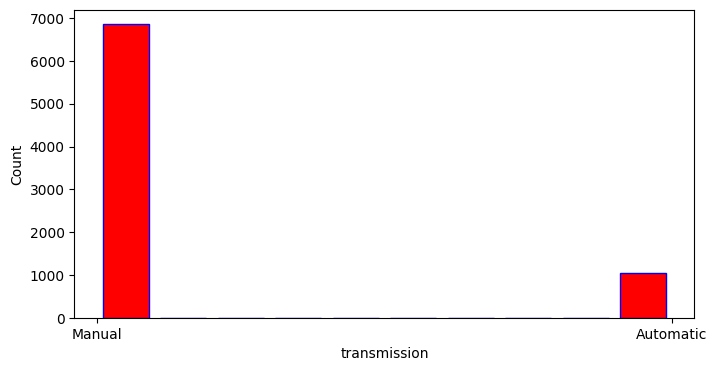

In [28]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (8,4)
plt.hist(df4.transmission,color = "Red",ec='blue',rwidth=0.8)
plt.xlabel("transmission")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

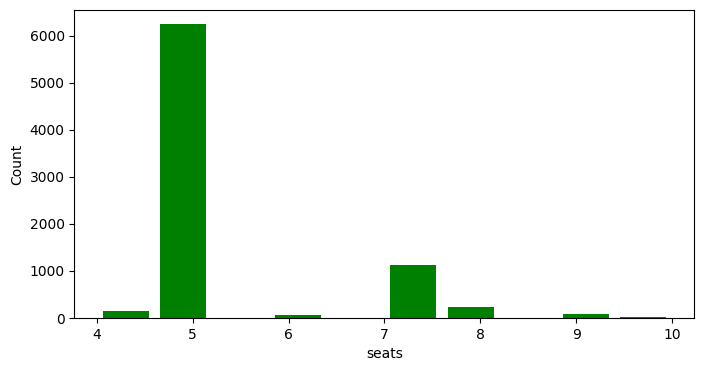

In [29]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (8,4)
plt.hist(df4.seats,color='green',rwidth=0.8)
plt.xlabel("seats")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

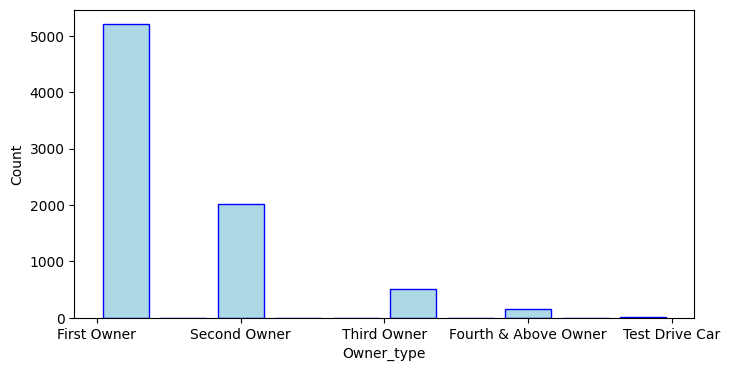

In [30]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (8,4)
plt.hist(df4.owner,color='lightblue',ec='blue',rwidth=0.8)
plt.xlabel("Owner_type")
plt.ylabel("Count")

Text(0, 0.5, 'Km')

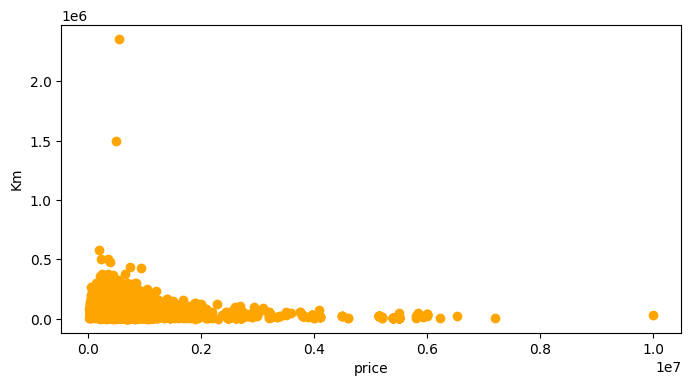

In [31]:
plt.scatter(df4.selling_price,df4.km_driven,color='orange')
plt.xlabel('price')
plt.ylabel('Km')

# Feature_engineering

In [32]:
df4.describe()

,selling_price,km_driven,mileage,engine,seats,No_years
count,7.888000e+03,7.888000e+03,7888.000000,7888.000000,7888.000000,7888.000000
mean,6.497278e+05,6.920102e+04,19.471222,1458.316557,5.416962,9.011663
std,8.135148e+05,5.683089e+04,3.920043,503.301684,0.953703,3.863444
min,2.999900e+04,1.000000e+00,9.000000,624.000000,4.000000,3.000000
25%,2.700000e+05,3.500000e+04,17.000000,1197.000000,5.000000,6.000000
50%,4.500000e+05,6.000000e+04,19.000000,1248.000000,5.000000,8.000000
75%,6.900000e+05,9.562500e+04,22.000000,1582.000000,5.000000,11.000000
max,1.000000e+07,2.360457e+06,42.000000,3604.000000,10.000000,29.000000


In [33]:
upper_limit=df4.selling_price.quantile(0.9999)
upper_limit

7791639.999997279

In [34]:
lower_limit=df4.selling_price.quantile(0.0001)
lower_limit

29999.7887

In [35]:
df5=df4[(df4.selling_price<upper_limit)&(df4.selling_price>lower_limit)]
df5.shape

(7886, 10)

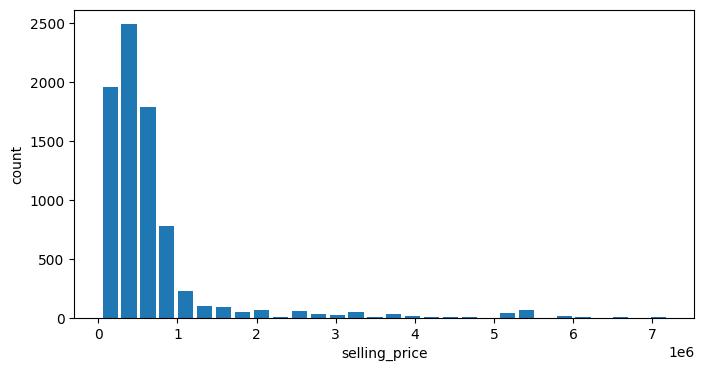

In [36]:
plt.hist(df5.selling_price,bins=30, rwidth=0.8)
plt.xlabel('selling_price')
plt.ylabel('count')
plt.show()

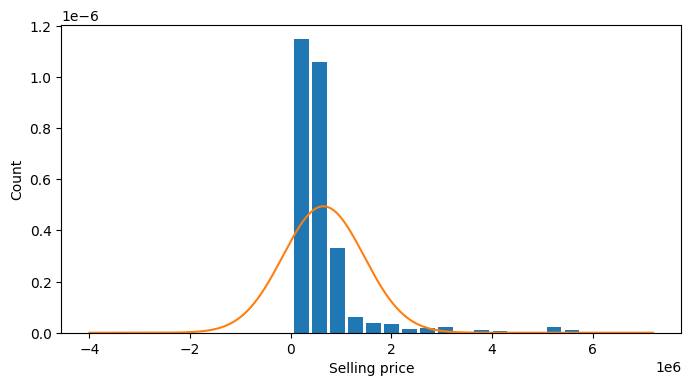

In [37]:
from scipy.stats import norm
import numpy as np

plt.hist(df5.selling_price, bins=20, rwidth=0.8,density=True)
plt.xlabel('Selling price')
plt.ylabel('Count')

rng = np.arange(-4000000, df5.selling_price.max(), 100)
plt.plot(rng, norm.pdf(rng,df5.selling_price.mean(),df5.selling_price.std()))

In [38]:
df6=df5.drop(['seller_type','transmission','owner'],axis=1)
df6.head()

,selling_price,km_driven,fuel,mileage,engine,seats,No_years
0,450000,145500,Diesel,23,1248,5,9
1,370000,120000,Diesel,21,1498,5,9
2,158000,140000,Petrol,18,1497,5,17
3,225000,127000,Diesel,23,1396,5,13
4,130000,120000,Petrol,16,1298,5,16


In [39]:
#Dummies creation

In [40]:
dummies=pd.get_dummies(df6.fuel)
dummies.sample(3)

,CNG,Diesel,LPG,Petrol
2007,0,1,0,0
4276,0,0,0,1
4796,0,1,0,0


In [41]:
df7=pd.concat([df6,dummies],axis=1)
df7.head(3)

,selling_price,km_driven,fuel,mileage,engine,seats,No_years,CNG,Diesel,LPG,Petrol
0,450000,145500,Diesel,23,1248,5,9,0,1,0,0
1,370000,120000,Diesel,21,1498,5,9,0,1,0,0
2,158000,140000,Petrol,18,1497,5,17,0,0,0,1


In [42]:
df8=df7.drop(['fuel'],axis=1)
df8.head(3)

,selling_price,km_driven,mileage,engine,seats,No_years,CNG,Diesel,LPG,Petrol
0,450000,145500,23,1248,5,9,0,1,0,0
1,370000,120000,21,1498,5,9,0,1,0,0
2,158000,140000,18,1497,5,17,0,0,0,1


In [43]:
df8.sample(5)

,selling_price,km_driven,mileage,engine,seats,No_years,CNG,Diesel,LPG,Petrol
4253,155000,100000,15,1998,5,24,0,1,0,0
3674,312000,80000,14,1399,7,9,0,0,0,1
4045,222000,120000,21,814,5,11,0,0,1,0
4782,2711000,9000,14,1999,5,6,0,1,0,0
1703,500000,35000,17,1497,7,8,0,0,0,1


In [44]:
df8.shape

(7886, 10)

<Axes: >

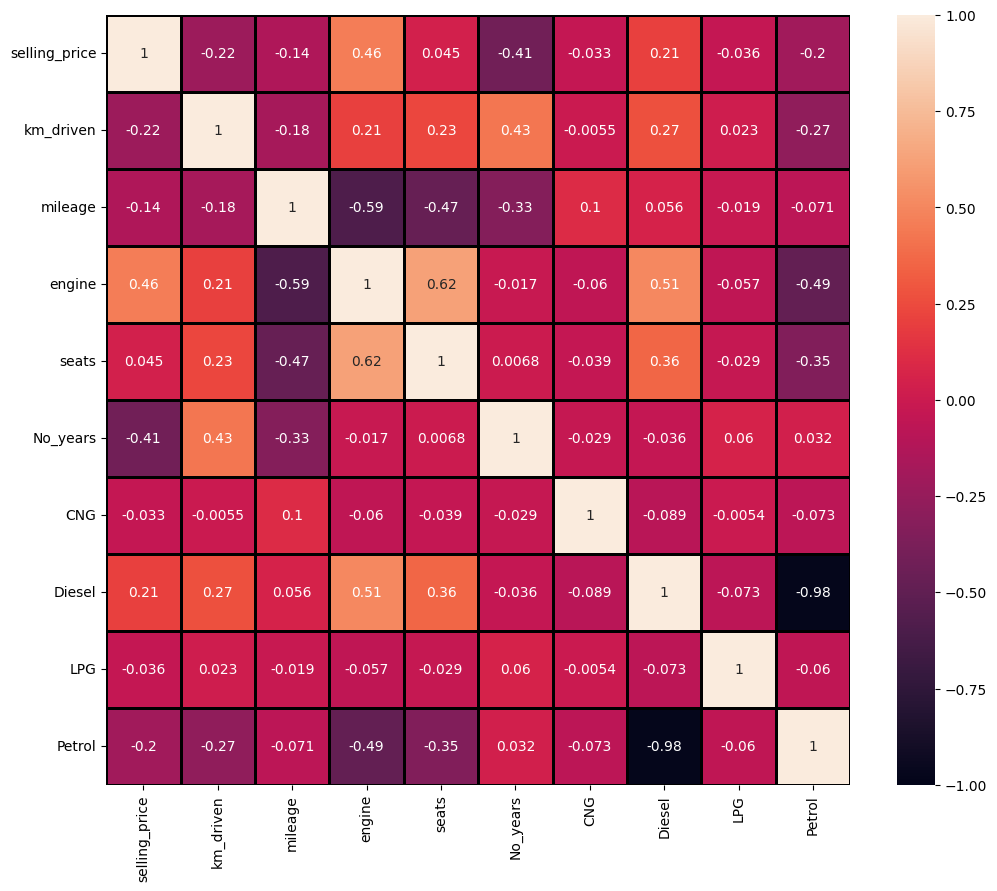

In [45]:
plt.figure(figsize=(12,10))
sns.heatmap(data = df8.corr(), annot= True,  vmin= -1 , vmax= 1, linecolor='black', linewidths=2)

# Model creation

In [46]:
X=df8.drop('selling_price',axis=1)
X.head(3)

,km_driven,mileage,engine,seats,No_years,CNG,Diesel,LPG,Petrol
0,145500,23,1248,5,9,0,1,0,0
1,120000,21,1498,5,9,0,1,0,0
2,140000,18,1497,5,17,0,0,0,1


In [47]:
y=df8.selling_price
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 7886, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [49]:
len(X_test)

1578

In [50]:
from sklearn.linear_model import LinearRegression

lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)

LinearRegression()

In [51]:
lr_clf.score(X_test,y_test)

0.4719826578980564

In [52]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.48773514, 0.42860803, 0.51059461, 0.41976409, 0.49223606])

In [53]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                #'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'Random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                #'n_estimators' : ['30','40']
                
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.467788,{}
1,lasso,0.467790,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.908441,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,Random_forest,0.948161,{}


In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
models = [ LinearRegression, DecisionTreeRegressor, RandomForestRegressor, Lasso]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))

In [55]:
MLModels_df = pd.DataFrame({"Models": [ 'Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Lasso'],
                           "Mean Squared Error": mse,
                           "Root Mean Squared Error": rmse,
                           "Explained Variance Score": evs,
                           "R-Square Score / Accuracy": r_square_score})

MLModels_df.set_index('Models', inplace=True)
MLModels_df.head()

,Mean Squared Error,Root Mean Squared Error,Explained Variance Score,R-Square Score / Accuracy
Models,,,,
Linear Regression,3.306915e+11,575057.803425,0.472014,0.471983
Decision Tree Regressor,4.161308e+10,203992.841524,0.933557,0.933556
Random Forest Regressor,2.777491e+10,166658.059808,0.955653,0.955652
Lasso,3.306915e+11,575057.836492,0.472014,0.471983


In [56]:
#I select Random Forest Regressor in this model have small RMSE and high Accuracy

In [57]:
model=RandomForestRegressor()

In [58]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [59]:
model.score(X_test,y_test)

0.9568313664880586

In [60]:
cross_val_score(RandomForestRegressor(), X, y, cv=cv)

array([0.93261046, 0.95417546, 0.949584  , 0.95044297, 0.95422139])

In [61]:
model.predict([[145500,23,1248,5,9,0,1,0,0]])

array([455508.09333333])

In [62]:
def predict_price(fuel,km_driven,mileage,engine,seats,no_years):    
    loc_index = np.where(X.columns==fuel)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = km_driven
    x[1] = mileage
    x[2] = engine
    x[3] = seats
    x[4] = no_years
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [63]:
predict_price('Petrol',145500,23,1248,5,9)

451061.4266666667

In [64]:
predict_price('Petrol',120000,23,1248,6,1)

546300.0

In [65]:
predict_price('CNG',10000,23,1248,6,1)

823773.3333333333

In [67]:
import pickle
with open('Cardekho_price_prediction.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [68]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("car_columns.json","w") as f:
    f.write(json.dumps(columns))